# Linear Regression and Gradient Descent from Scratch

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Example 1
perfect fit, intercept is zero.

In [ ]:
df = pd.read_csv("linear01.csv")
print(df.columns)
print(df.shape)

Index(['price_eur', 'price_lira'], dtype='object')
(21, 2)


In [14]:
slope = 150/5
df["yhat"] = df["price_eur"] * slope

In [15]:
df.head()

,price_eur,price_lira,yhat
0,0.0,0.0,0.0
1,5.0,150.0,150.0
2,10.0,300.0,300.0
3,15.0,450.0,450.0
4,20.0,600.0,600.0


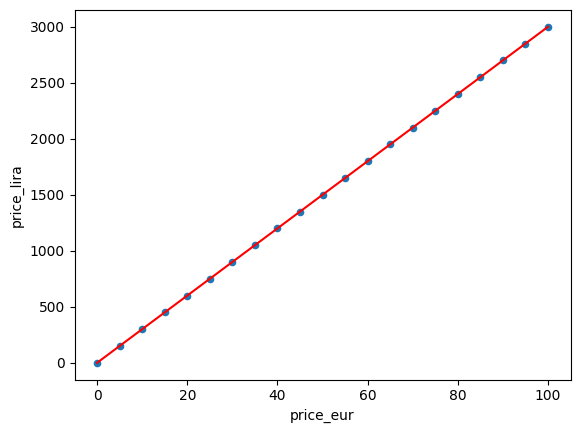

In [16]:
df.plot.scatter(x="price_eur", y="price_lira")
plt.plot(df["price_eur"], df["yhat"], "r-")

### Example 2
intercept is nonzero.

In [17]:
df = pd.read_csv("linear02.csv")
print(df.columns)
print(df.shape)

Index(['sqm', 'price_eur'], dtype='object')
(21, 2)


In [18]:
df.head(3)

,sqm,price_eur
0,20.0,51.0
1,22.5,56.0
2,25.0,61.0


In [22]:
y_diff = 56 - 51
x_diff = 22.5 - 20.0
slope = y_diff / x_diff
intercept = 51 - 20 * slope
slope, intercept

(2.0, 11.0)

In [23]:
df["yhat"] = df["sqm"] * slope + intercept

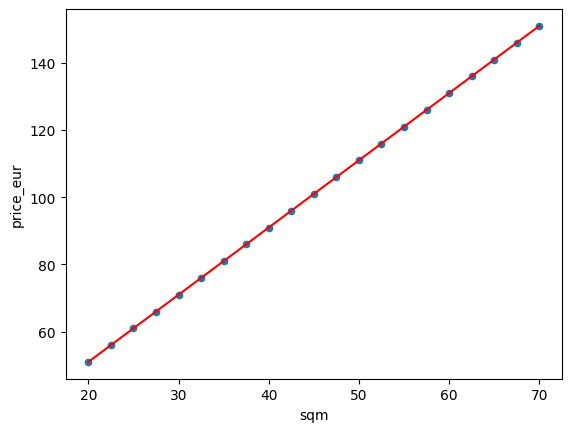

In [24]:
df.plot.scatter(x="sqm", y="price_eur")
plt.plot(df["sqm"], df["yhat"], "r-")

### Example 3
error is nonzero.

In [25]:
df = pd.read_csv("linear03.csv")
print(df.columns)
print(df.shape)

Index(['x1', 'y'], dtype='object')
(51, 2)


<Axes: xlabel='x1', ylabel='y'>

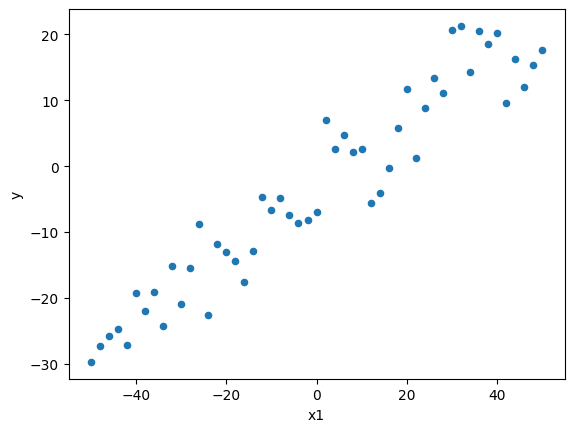

In [26]:
df.plot.scatter(x="x1", y="y")

In [31]:
best_slope = 0
best_intercept = 0
best_mse = 999999999999999.999

# brute force: try a range of possible slopes/intercepts
for i in range(100):
    for j in range(-50, 50):
        slope = i / 10
        intercept = j / 10
        yhat = df["x1"] * slope + intercept
        mse = ((df["y"] - yhat) ** 2).mean()
        if mse < best_mse:
            best_mse = mse
            best_slope = slope
            best_intercept = intercept

In [32]:
best_slope

0.5

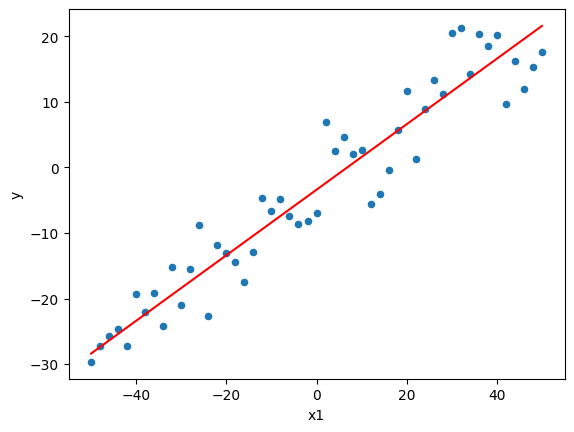

In [34]:
df["yhat"] = df["x1"] * best_slope + best_intercept

df.plot.scatter(x="x1", y="y")
plt.plot(df["x1"], df["yhat"], "r-")

### Gradient Descent

In [61]:
df = pd.read_csv("linear07.csv")
print(df.columns)
print(df.shape)

Index(['x1', 'x2', 'y'], dtype='object')
(1000, 3)


In [62]:
df["x0"] = 1.0

X = df[["x1", "x2", "x0"]].values
ytrue = df["y"].values

In [63]:
def model(X, a):
    return np.dot(X, a)

In [64]:
def mse(yhat, ytrue):
     return ((ytrue - yhat) ** 2).mean()

In [65]:
def gradient(X, a, ytrue):
    """result should be a vector with the size of a"""
    return np.dot((2 * model(X, a) - ytrue), X)

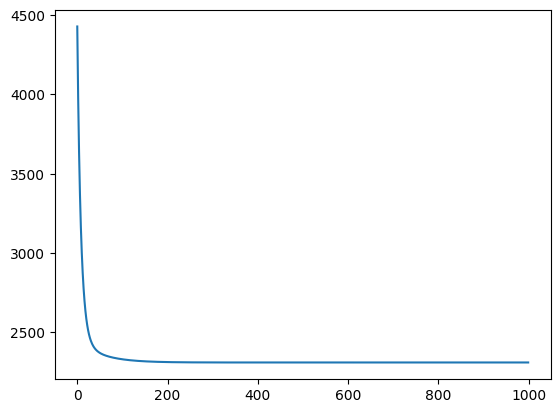

In [80]:
# gradient descent
a = np.random.normal(size=3)
learning_rate = 0.0000001

history = []
for i in range(1000):
    gd = gradient(X, a, ytrue)
    a = a - gd * learning_rate
    yhat = model(X, a)
    history.append(mse(yhat, ytrue))

plt.plot(history)

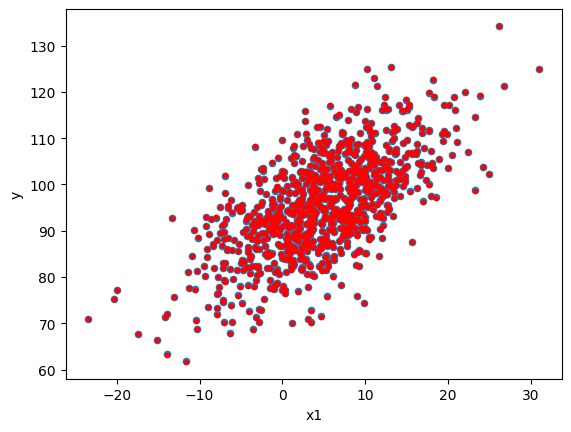

In [81]:
df.plot.scatter(x="x1", y="y")
plt.plot(df["x1"], 2 * yhat, "r.")